# Cat vs. Dog CNN Image Classifier
## Introduction
This workflow is inspired by similar work done by Balaji Srinivas and Sentdex on cat vs. dog classification. It is a basic example of convolution nerual networks and follows a standard machine learning workflow. 

## Dataset
This dataset was downloaded from Kaggle. This version of the dataset was downloaded in early 2017, and contains serveral images that will cause errors when using the cv2.imread function.

## Approach/Process
1. Import Libraries
2. Import data
3. Data prepartion
4. Training/Validation Split
5. Build/Fit the Model
6. Testing/Results

## Results
When tested on a picture of my own dog the model performed well, however, when tested on a personal picture of cats the model did not correctly classify the image.


#### Library Imports

In [4]:
import os
import warnings
import numpy as np
import cv2         # cv -> computer vision library
import random
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from PIL import Image
warnings.filterwarnings("ignore")

In [5]:
directory = r'C:\Users\Lorenzo Olguin\Desktop\Projects\cat_v_dog_cnn'
cat = r'C:\Users\Lorenzo Olguin\Desktop\Projects\Cat'
dog = r'C:\Users\Lorenzo Olguin\Desktop\Projects\Dog'
categories = ['Cat','Dog']

In [6]:
img_size = 100 # standard image size set for all photos. Keeps the photos all the same size.

data = []

for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)
    count = 0 # counter for the number of photos that contain errors/will not work
    for image in os.listdir(folder):
        try:    
            img_path = os.path.join(folder, image)
            img_array = cv2.imread(img_path) #converts image into array
            img_array = cv2.resize(img_array, (img_size, img_size)) #interpolation = cv2.INTER_AREA
            data.append([img_array, label]) 
        except:
            count +=1
            pass
    print(count)

    
# 25 Cat photos were removed/excluded from the original dataset, photos might have been corrupt
# 31 Dog photos were removed/excluded from the original dataset

25
31


In [7]:
len(data) #the number of photos of both dogs and cats.

24946

In [8]:
# A look at the first photo.
# Numbers exist within the range of 0 to 255. 
data[0]

[array([[[ 88, 165, 204],
         [ 93, 170, 209],
         [ 98, 175, 214],
         ...,
         [129, 209, 246],
         [123, 206, 244],
         [122, 201, 240]],
 
        [[ 88, 165, 204],
         [ 93, 170, 209],
         [ 98, 175, 214],
         ...,
         [131, 212, 247],
         [126, 207, 245],
         [124, 203, 242]],
 
        [[ 89, 166, 205],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [137, 214, 247],
         [129, 210, 245],
         [126, 205, 244]],
 
        ...,
 
        [[ 57, 125, 160],
         [ 58, 126, 161],
         [ 60, 128, 163],
         ...,
         [  0,   4,   3],
         [  0,   4,   3],
         [  0,   3,   2]],
 
        [[ 57, 124, 155],
         [ 59, 126, 157],
         [ 61, 128, 159],
         ...,
         [  1,   3,   3],
         [  1,   3,   3],
         [  1,   3,   3]],
 
        [[ 54, 121, 152],
         [ 56, 123, 154],
         [ 60, 127, 158],
         ...,
         [  0,   1,   1],
  

In [9]:
# Size of each element in the data list
# Each element contains the image array and the image classifer/label
print(len(data[0]))
print(len(data[21069]))   # Random number chosen to show consistency in the list

2
2


In [10]:
#random.shuffle(data) # randomizes the dataset

In [11]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [12]:
# convert the lists into numpy arrays
X = np.array(X)
y = np.array(y)

In [13]:
# Converts the numpy arrays into pickle files
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [14]:
# Open the pickle files
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [15]:
#feature scalling
X = X/255 # RGB values range from 0 to 255

In [16]:
X.shape #Data, height, width, RGB channels, everything but the Data column is used in the Neural Network

(24946, 100, 100, 3)

In [18]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=36)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
# Instantiation of the model
model = Sequential()

#Adding layers to the model
model.add(Conv2D(32, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
#now pass into NN layers

model.add(Dense(128, input_shape = X.shape[1:], activation='relu')) # Dense layers must be 1-D
model.add(Dropout(0.5)) # Having a single dropout layer after the last hidden layer is better 
# practice than to have dropout after every layer, dropout can lead to overfitting on the training data

# 2 is for ouput of dog and cat for softmax, but I switched to sigmoid
model.add(Dense(1, activation='sigmoid')) 

# Softmax is good for binary classification but I didn't seem to get the expect results
# That is why I went with sigmoid here

In [18]:
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # could also use adam optimizer
#print(model.summary())


In [19]:
# Double checking the shape of the input data
X_train.shape

(21204, 100, 100, 3)

In [20]:
# Fitting/Making the model
# Validation_split -> The model will set apart this fraction of the training data, will not train on it, and will 
# evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from 
# the last samples in the x and y data provided, before shuffling.
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
597/597 [==============================] - 1205s 2s/step - loss: 0.6378 - accuracy: 0.6373 - val_loss: 0.5280 - val_accuracy: 0.7369
Epoch 2/5
597/597 [==============================] - 1231s 2s/step - loss: 0.5168 - accuracy: 0.7531 - val_loss: 0.5326 - val_accuracy: 0.7463
Epoch 3/5
597/597 [==============================] - 1405s 2s/step - loss: 0.4554 - accuracy: 0.7925 - val_loss: 0.4003 - val_accuracy: 0.8232
Epoch 4/5
597/597 [==============================] - 1416s 2s/step - loss: 0.4165 - accuracy: 0.8167 - val_loss: 0.4405 - val_accuracy: 0.8086
Epoch 5/5
597/597 [==============================] - 1175s 2s/step - loss: 0.3801 - accuracy: 0.8340 - val_loss: 0.3633 - val_accuracy: 0.8439


In [40]:
import datetime as dt
model.save(str(dt.date.today()) + 'cat_v_dog' + str(1) + '.h5')

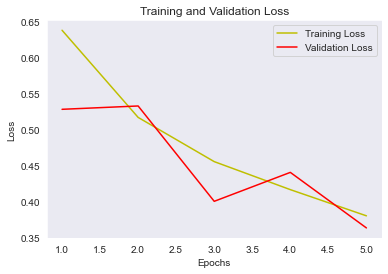

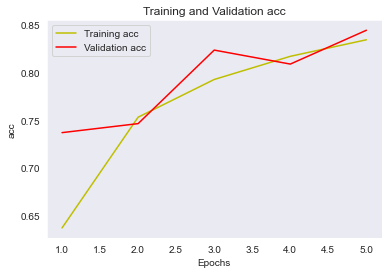

In [25]:
sns.set_style('dark')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [19]:
#We can load the trained model, so we don't have to train again for 300 epochs!

from keras.models import load_model
model = load_model('2021-08-15cat_v_dog1.h5')


In [20]:
__, acc = model.evaluate(X_test, y_test)
print('Accuracy = ', (acc*100.0), '%')

117/117 [==============================] - 90s 773ms/step - loss: 0.3947 - accuracy: 0.8335
Accuracy =  83.3511471748352 %


In [41]:
threshold = 0.5725
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test) >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1548  288]
 [ 300 1606]]


In [28]:
# from sklearn.metrics import plot_confusion_matrix
# matrix = plot_confusion_matrix(cm, X_test, y_test)
# matrix.ax_.set_title('Confusion Matrix', color='black')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')


In [29]:
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""

from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

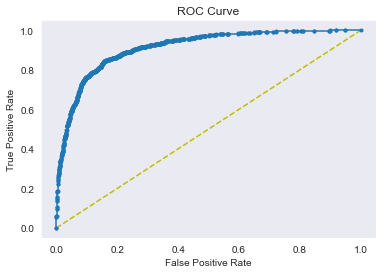

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [31]:
#Finding the optimal threshold value would be where "true positive rate" is high and "false positive rate" is low
#We should find the threshold where tpr-(1-fpr) is zero or close to zero.

import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]] # Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  428    0.572594
Name: thresholds, dtype: float32


In [32]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier 
#is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


Area under curve, AUC =  0.9128646036938736
